In [41]:
import zarr
from buffer.frame_buffer import ReplayBuffer
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
import math

In [2]:
replay_buffer = ReplayBuffer(int(2e3), history_size=1, dshape=(160, 384, 3), dtype=torch.uint8, goal_size=3)
replay_buffer.load(Path('/Users/nimit/Documents/robomaster/habitat/160x384'))
# zarr.load('/Users/nimit/Documents/robomaster/habitat/160x384', mode='r')

[!] loaded buffer


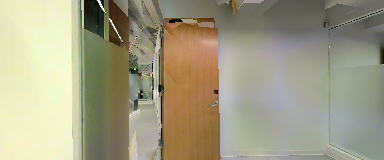

In [84]:
i = 20
Image.fromarray(replay_buffer.targets[i].squeeze().numpy())

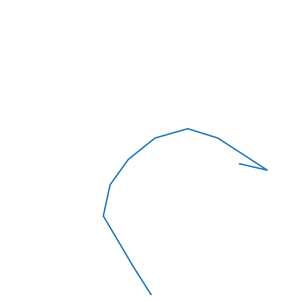

In [113]:
    fig, ax = plt.subplots(ncols=1, nrows=1)

    R = r[i:i+20:2]-r[i] # relative
    T = t[i:i+20:2] # absolute
    ax.set_ylim(0, 2)
    ax.set_xlim(-1,1)
    x, y = R*np.cos(T), R*np.sin(T)
    x, y = rotate_origin_only(x, y, -t[i])
    ax.plot(x, y)

    ax.axis('off')
    fig.tight_layout(pad=0)

    # To remove the huge white borders
    ax.margins(0)

    fig.canvas.draw()
    image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    plt.imshow(image_from_plot)

In [39]:
def rotate_origin_only(x, y, radians):
    """Only rotate a point around the origin (0, 0)."""
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

/Users/nimit/anaconda3/envs/robot/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()


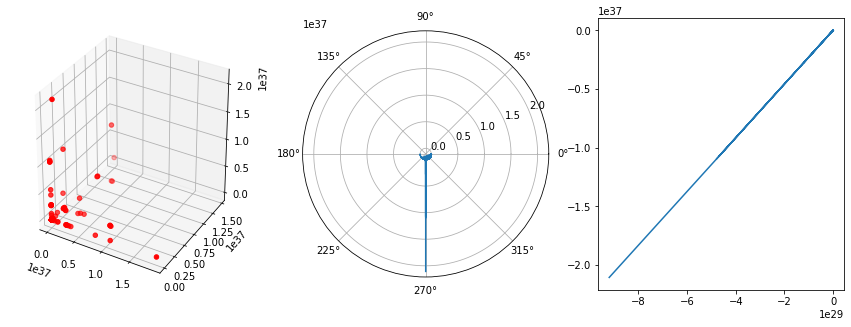

In [27]:
# 0 -> 140
# 140 -> 269
# 269 -> 431
r, c, s = replay_buffer.goals[:].T

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(c, s, r, c='r', marker='o')

ax2 = fig.add_subplot(132, projection='polar')
t = -np.arccos(c)
ax2.plot(t, r)

ax3 = fig.add_subplot(133)
ax3.plot(r*np.cos(t), r*np.sin(t))